In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
df=pd.read_excel("data6.xlsx")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.01587
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.01340
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.02058
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.01867
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.01885


In [10]:
from sklearn.preprocessing import LabelEncoder
le_diagnosis=LabelEncoder()
df["diagno_n"]=le_diagnosis.fit_transform(df["diagnosis"])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se,diagno,diagno_n
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.01587,1,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.01340,1,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.02058,1,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.01867,1,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.01885,1,1


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(["id","diagno","diagnosis","diagno_n"],axis=1),df.diagno_n,train_size=0.8)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
print("classification score :",model.score(x_test,y_test))

classification score : 0.9035087719298246


C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
y_pred=model.predict(x_test)
print("classification accuracy is :",metrics.accuracy_score(y_test,y_pred))

classification accuracy is : 0.9035087719298246


In [19]:
print(metrics.confusion_matrix(y_test,y_pred))

[[76  6]
 [ 5 27]]


In [20]:
cn=metrics.confusion_matrix(y_test,y_pred)
t_p=cn[1,1]
t_n=cn[0,0]
f_p=cn[0,1]
f_n=cn[1,0]
print("True_positive:",t_p)
print("False_positive:",f_p)
print("True_negative:",t_n)
print("False_negative:",f_n)

True_positive: 27
False_positive: 6
True_negative: 76
False_negative: 5


In [21]:
print("classification accuracy:",(t_p+t_n)/float(t_p+t_n+f_p+f_n))
print("classification error:",(f_p+f_n)/float(t_p+t_n+f_p+f_n))
print("Sensitivity: ",t_p/float(f_n+t_p))
print("Specificity: ",t_n/(t_n+f_p))
print("Precision :",t_p/(t_p+f_p))
print("false positive rate:",f_p/(f_p+t_n))

classification accuracy: 0.9035087719298246
classification error: 0.09649122807017543
Sensitivity:  0.84375
Specificity:  0.926829268292683
Precision : 0.8181818181818182
false positive rate: 0.07317073170731707


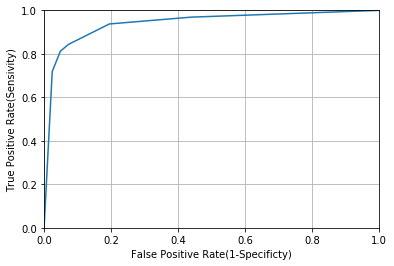

In [22]:
probas_ =model.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("True Positive Rate(Sensivity)")
plt.xlabel("False Positive Rate(1-Specificty)")
plt.plot(fpr,tpr,label='(AUC = %0.2f)' % (roc_auc))

In [23]:
print("Area Under the Cuve: ",roc_auc)

Area Under the Cuve:  0.9409298780487805
